# Pandas Datetime Capabilities and Visualizations

Pandas' datetime objects makes it possible to accomplish complex datetime operations in just a few lines of code.

In [1]:
# importing the libraries for data processing
import numpy as np 
import pandas as pd 

#matplotlib for visualizations
import matplotlib.pyplot as plt

### 1. Data Preparation

In [2]:
# read and process the charts dataset
df = pd.read_csv('data/spotify_daily_charts.csv')
#transform date column into a datetime column
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


### 2. Pandas Time Series Aggregation Capabilties
A *time series* is any data that is indexed by some measure of time. 

A *time series plot* is a graph where some measure of time is the unit on the x-axis, often called the time-axis. The y-axis is for the variable that is being measured. 

Pandas has some quick one-liners to help you operate on time series data.

##### 2.1. Resampling

With a datetime object set as index, a pandas dataframe can be aggregated in time with one simple line!

In [4]:
df = df.set_index('date')
df.head()

,position,track_id,track_name,artist,streams
date,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [5]:
# get total yearly streams
yr_df = df['streams'].resample('Y').sum() #M for month
yr_df

date
2017-12-31    3242144459
2018-12-31    3467089600
2019-12-31    4081571771
2020-12-31    4000302402
2021-12-31    4413002418
2022-12-31    1941887615
Freq: A-DEC, Name: streams, dtype: int64

<AxesSubplot:xlabel='date'>

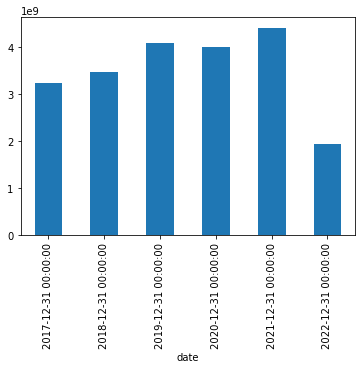

In [6]:
yr_df.plot(kind='bar')

Text(0.5, 1.0, 'Spotify Yearly Total Streams')

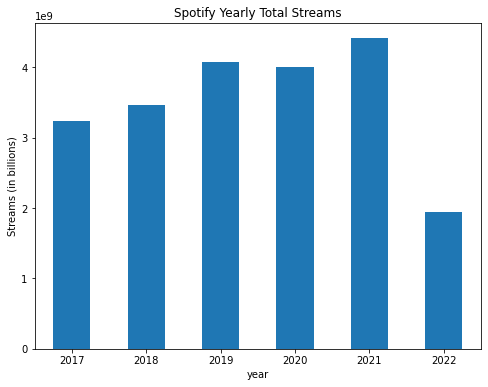

In [7]:
#bar chart of yearly streams
fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
yr_df.plot(ax=ax, kind='bar')

#Uncomment for cleaner x labels
ax.set_xticklabels([x.strftime('%Y') for x in yr_df.index], rotation=0)

plt.xlabel('year')
plt.ylabel('Streams (in billions)')
plt.title('Spotify Yearly Total Streams')

In [10]:
#get total monthly streams
mon_df = df['streams'].resample('MS').sum() #M for month
mon_df

date
2017-01-01    266793359
2017-02-01    257152832
2017-03-01    308660052
2017-04-01    258623055
2017-05-01    247044780
                ...    
2022-01-01    425757811
2022-02-01    400181086
2022-03-01    424610766
2022-04-01    422194373
2022-05-01    269143579
Freq: MS, Name: streams, Length: 65, dtype: int64

Text(0.5, 1.0, 'Spotify Monthly Total Streams')

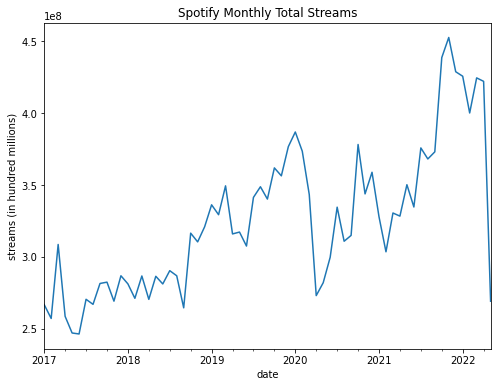

In [14]:
#line chart of monthly streams
fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
mon_df.plot(ax=ax, kind='line')

#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

plt.ylabel('streams (in hundred millions)')
plt.title('Spotify Monthly Total Streams')

Q: Compute for the artist *BLACKPINK*'s total yearly streams from 2018-2020

In [18]:
df[df['artist']=='BLACKPINK']['streams'].resample('Y').mean()

date
2017-12-31    26878.300000
2018-12-31    43762.519313
2019-12-31    47791.364099
2020-12-31    91476.352980
2021-12-31    40660.899814
Freq: A-DEC, Name: streams, dtype: float64

Text(0.5, 1.0, 'Yearly Total Streams')

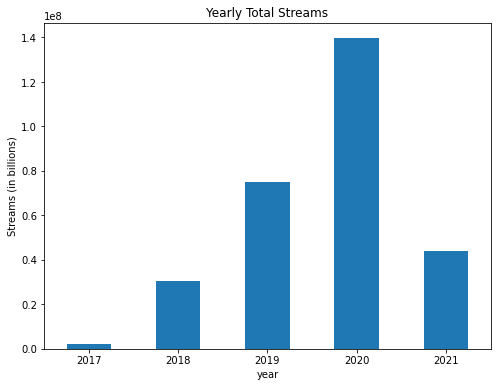

In [23]:
#bar chart of yearly streams
fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

artist_yr_df = df[df['artist']=='BLACKPINK']['streams'].resample('Y').sum()
artist_yr_df.plot(ax=ax, kind='bar')

#Uncomment for cleaner x labels
ax.set_xticklabels([x.strftime('%Y') for x in artist_yr_df.index], rotation=0)

plt.xlabel('year')
plt.ylabel('Streams (in billions)')
plt.title('Yearly Total Streams')

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

#### 2.2 First-Order differencing

At times, we might be more interested in the change of a quantity in time rather than the absolute quantities. We use `df.diff()` for this

In [26]:
# month - previous month
delta_mon_df = mon_df.diff()
delta_mon_df

date
2017-01-01            NaN
2017-02-01     -9640527.0
2017-03-01     51507220.0
2017-04-01    -50036997.0
2017-05-01    -11578275.0
                 ...     
2022-01-01     -3123184.0
2022-02-01    -25576725.0
2022-03-01     24429680.0
2022-04-01     -2416393.0
2022-05-01   -153050794.0
Freq: MS, Name: streams, Length: 65, dtype: float64

Q: How did Spotify streams grow month-on-month from 2017 to 2021?

Text(0.5, 1.0, 'Spotify Month-on-Month Stream Growth')

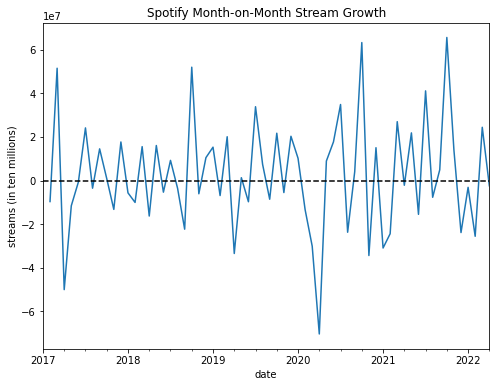

In [28]:
#line chart of monthly streams

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
#omit incomplete month
delta_mon_df[:-1].plot(ax=ax)

#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

#add reference line at y=0
plt.axhline(0, color='k', ls='--')

plt.ylabel('streams (in ten millions)')
plt.title('Spotify Month-on-Month Stream Growth')

> Q: Can you show the above month-on-month growth plot as a percentage of the previous month?

#### 2.3 Cummulative sum

We compute for the cummulative sum using `df.cumsum()`

In [29]:
#get cummulative total spotify monthly streams
mon_df.cumsum()

date
2017-01-01      266793359
2017-02-01      523946191
2017-03-01      832606243
2017-04-01     1091229298
2017-05-01     1338274078
                 ...     
2022-01-01    19629868461
2022-02-01    20030049547
2022-03-01    20454660313
2022-04-01    20876854686
2022-05-01    21145998265
Freq: MS, Name: streams, Length: 65, dtype: int64

Q: Compute for the cummulative total monthly streams of Ben and Ben's 'Kathang Isip' 

In [32]:
df[df['track_name']=='Kathang Isip']['streams'].resample('M').sum().cumsum()

date
2017-12-31       280954
2018-01-31      1143970
2018-02-28      2602759
2018-03-31      5640851
2018-04-30      8612270
2018-05-31     12167968
2018-06-30     16174690
2018-07-31     20711428
2018-08-31     25637997
2018-09-30     30259253
2018-10-31     36163507
2018-11-30     41730039
2018-12-31     47064210
2019-01-31     52937957
2019-02-28     58122113
2019-03-31     62464276
2019-04-30     65529892
2019-05-31     68589232
2019-06-30     71271137
2019-07-31     74342837
2019-08-31     77746429
2019-09-30     81422570
2019-10-31     85181331
2019-11-30     88677596
2019-12-31     92394161
2020-01-31     96193708
2020-02-29    100263565
2020-03-31    103791352
2020-04-30    106276000
2020-05-31    108745632
2020-06-30    111276239
2020-07-31    113816804
2020-08-31    116409758
2020-09-30    118960089
2020-10-31    121629196
2020-11-30    124116994
2020-12-31    126735698
2021-01-31    129190360
2021-02-28    131446391
2021-03-31    133818454
2021-04-30    136024962
2021-05-31 

Text(0.5, 1.0, 'Spotify Monthly Total Streams')

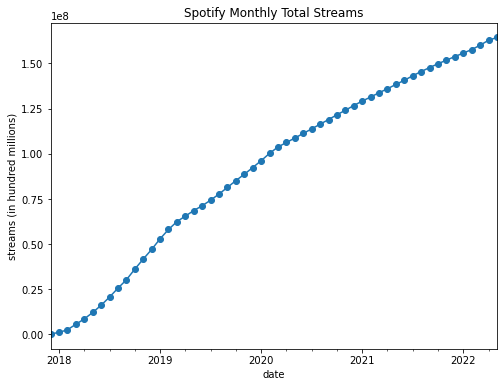

In [33]:
#line chart of monthly streams
fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
data = df[df['track_name']=='Kathang Isip']['streams'].resample('M').sum().cumsum()

data.plot(ax=ax,marker='o')
#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

plt.ylabel('streams (in hundred millions)')
plt.title('Spotify Monthly Total Streams')

Q: How does the cummulative total monthly streams of Ed Sheeran's Shape of You compare with  Ben and Ben's 'Kathang Isip' ?

Text(0.5, 1.0, 'Spotify Monthly Total Streams')

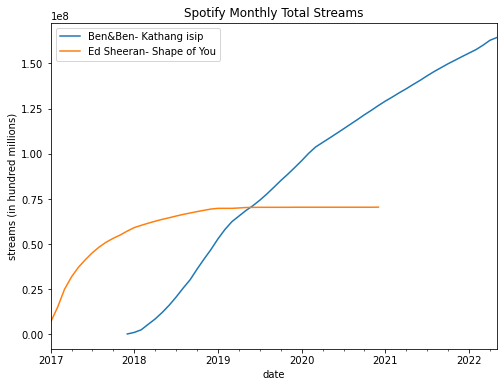

In [34]:
#line chart of monthly streams

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
data1 = df[df['track_name']=='Kathang Isip']['streams'].resample('M').sum().cumsum()
data2 = df[df['track_name']=='Shape of You']['streams'].resample('M').sum().cumsum()

data1.plot(ax=ax, label='Ben&Ben- Kathang isip')
data2.plot(ax=ax, label='Ed Sheeran- Shape of You')
#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

plt.legend()
plt.ylabel('streams (in hundred millions)')
plt.title('Spotify Monthly Total Streams')

#### 2.4 Rolling window

We can use the function `.rolling()` to define a time series window where we could aggregate the target variable

Q: Smooth out daily streams of Ben and Ben's Kathang Isip over a 1-week window

In [36]:
df[df['track_name']=='Kathang Isip']['streams'].rolling(7).mean().head(10)

date
2017-12-17             NaN
2017-12-18             NaN
2017-12-19             NaN
2017-12-20             NaN
2017-12-21             NaN
2017-12-22             NaN
2017-12-23    22812.428571
2017-12-25    22502.571429
2017-12-26    22266.571429
2017-12-27    21935.285714
Name: streams, dtype: float64

Text(0.5, 1.0, 'Spotify Daily Streams: Ben&Ben- Kathang isip')

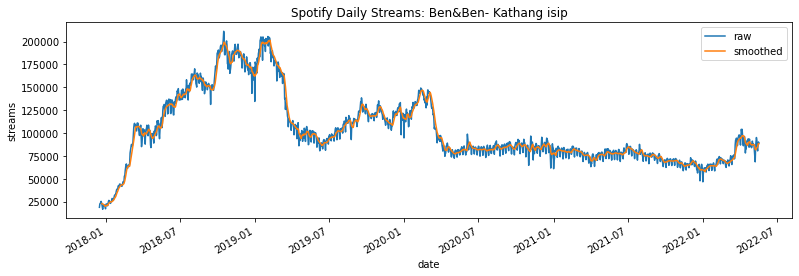

In [37]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

data1 = df[df['track_name']=='Kathang Isip']['streams']
data2 = df[df['track_name']=='Kathang Isip']['streams'].rolling(7).mean()

data1.plot(ax=ax, label='raw')
data2.plot(ax=ax, label='smoothed')

plt.legend()
plt.ylabel('streams')
plt.title('Spotify Daily Streams: Ben&Ben- Kathang isip')


Q: Compare the 7-day smoothed daily streams of Ben and Ben's Kathang Isip and Taylor Swift's Lover

Text(0.5, 1.0, 'Spotify Daily Streams')

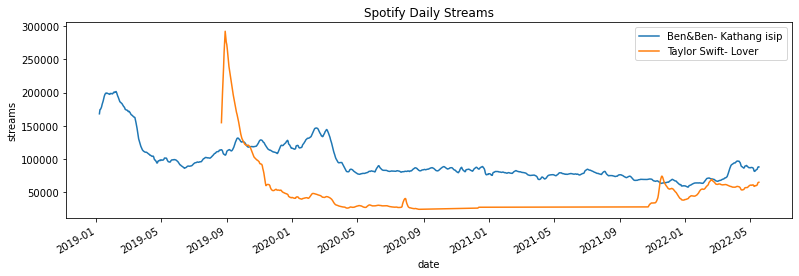

In [38]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

data1 = df[(df.index.year>=2019)&(df['track_name']=='Kathang Isip')]['streams'].rolling(7).mean()
data2 = df[(df.index.year>=2019)&(df['track_name']=='Lover')]['streams'].rolling(7).mean()

data1.plot(ax=ax, label='Ben&Ben- Kathang isip')
data2.plot(ax=ax, label='Taylor Swift- Lover')

plt.legend()
plt.ylabel('streams')
plt.title('Spotify Daily Streams')


>Q: What insights can you infer from the chart above?